In [8]:
import os, signal, sys, time
from ai_economist import foundation
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
from utils import plotting
os.chdir(os.path.dirname(os.path.abspath("__file__")))
'''
地图的设计：替换掉my_map.txt
规则的设计：替换掉layout_from_file

'''
env_config = {
    'scenario_name': 'layout_from_file/simple_wood_and_stone',
    'components': [
        ('Build', {'skill_dist': "pareto", 'payment_max_skill_multiplier': 3}),
        ('ContinuousDoubleAuction', {'max_num_orders': 5}),
        ('Gather', {}),
    ],   
    'env_layout_file': 'my_map_sperate.txt',
    'starting_agent_coin': 10,
    'fixed_four_skill_and_loc': False,    
    'n_agents': 3,          
    'world_size': [15, 10], 
    'episode_length': 1000,     
    'multi_action_mode_agents': False,
    'multi_action_mode_planner': True,
    'flatten_observations': False,
    'flatten_masks': True,
}
env = foundation.make_env_instance(**env_config)


In [9]:
def sample_random_action(agent, mask):
    if agent.multi_action_mode:
        split_masks = np.split(mask, agent.action_spaces.cumsum()[:-1])
        return [np.random.choice(np.arange(len(m_)), p=m_/m_.sum()) for m_ in split_masks]
    else:
        return np.random.choice(np.arange(agent.action_spaces), p=mask/mask.sum())

def sample_random_actions(env, obs):       
    actions = {
        a_idx: sample_random_action(env.get_agent(a_idx), a_obs['action_mask'])
        for a_idx, a_obs in obs.items()
    }
    return actions

obs = env.reset()
actions = sample_random_actions(env, obs)
obs, rew, done, info = env.step(actions)
print(env.get_agent(0).__dict__['state']['build_skill'])
# print(env.get_agent(0).__dict__['state']['build_payment'])
print(env.get_agent(1).__dict__['state']['build_skill'])
# print(env.get_agent(1).__dict__['state']['build_payment'])
print(env.get_agent(2).__dict__['state']['build_skill'])
# print(env.get_agent(2).__dict__['state']['build_payment'])


0.24382103859871718
0.22327148557591636
0.20524073123831088


In [10]:
def do_plot(env, ax, fig):
    plotting.plot_env_state(env, ax)
    ax.set_aspect('equal')
    display.display(fig)
    display.clear_output(wait=True)

def play_random_episode(env, plot_every=10, do_dense_logging=False):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    obs = env.reset(force_dense_logging=do_dense_logging)
    for t in range(env.episode_length):
        actions = sample_random_actions(env, obs)
        obs, rew, done, info = env.step(actions)
        if ((t+1) % plot_every) == 0:
            do_plot(env, ax, fig)
    if ((t+1) % plot_every) != 0:
        do_plot(env, ax, fig) 

obs = env.reset(force_dense_logging=False)
for t in range(env.episode_length):
    actions = sample_random_actions(env, obs)
    obs, rew, done, info = env.step(actions)
    print(rew)

{'0': -0.05250000000000021, '1': -0.05250000000000021, '2': -0.05250000000000021, 'p': 0.0}
{'0': -0.20999999999999996, '1': -0.05250000000000021, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.05250000000000021, '1': -0.052499999999999325, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.052499999999999325, '1': -0.05250000000000021, '2': -0.05250000000000021, 'p': 0.0}
{'0': -0.05250000000000021, '1': -0.05250000000000021, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.05250000000000021, '1': 0.0, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.20999999999999996, '1': 0.0, '2': -0.20999999999999996, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.20999999999999996, 'p': 0.0}
{'0': -0.05250000000000021, '1': 0.0, '2': -0.05250000000000021, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.20999999999999908, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999996, '1': -0.41999999999999993, '2': 0.0, 'p': 0.0}
{'0': -0.052499999999999325, '1': -0.20999999999999996, '2': -0.

{'0': -0.20999999999999908, '1': -0.05250000000000021, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.20999999999999908, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999908, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999908, '2': -0.2099999999999973, 'p': 0.0}
{'0': -0.20999999999999908, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.05250000000000199, '1': -0.20999999999999908, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.05249999999999844, '1': -0.05250000000000021, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': -0.2099999999999973, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.20999999999999908, '2': -0.05250000000000199, 'p': 0.0}
{'0': -0.21000000000000085, '1': 0.0, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.05249999999999844, '1': -0.41999999999999993, '2': -0.2099999999999973, 'p': 0.0}
{'0': -1.0215291750134021

{'0': -0.05250000000000199, '1': -0.05250000000000199, '2': -0.21000000000000085, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.20999999999999375, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': -0.21000000000000085, 'p': 0.0}
{'0': 0.0, '1': -0.052499999999994884, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000085, '1': 0.0, '2': -0.05250000000000199, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': -1.3321118260350922, '1': 0.9764175757653746, '2': -0.21000000000000085, 'p': -0.6666666666662957}
{'0': -0.05250000000000199, '1': -0.05250000000000199, '2': -0.21000000000000085, 'p': 0.0}
{'0': 0.0, '1': -0.2099999999999973, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.05250000000000199, '1': -0.21000000000000085, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.05250000000000199, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999375, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.05250000000000199, '1': -0.2099999999999973,

{'0': -0.05250000000000199, '1': -0.21000000000000085, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.05250000000000199, '2': -0.05250000000000199, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.20999999999999375, '2': -0.05250000000000199, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.05250000000000199, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.05250000000000199, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.20999999999999375, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.21000000000000085, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': 0.0, 'p': 0.0}
{'0': -0.05250000000000199, '1': -0.21000000000000085, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000085, '1': -0.21000000000000085, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000085, '1':

{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999375, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052499999999994884, '2': -0.21000000000000085, 'p': 0.0}
{'0': -0.052500000000009095, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999375, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052499999999994884, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.4200000000000017, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999375, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': -0.20999999999999375, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1

{'0': 0.0, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': 0.0, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000796, '1': 0.0, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.20999999999999375, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052500000000009095, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1': 0.0, '2': -0.052500000000009095, 'p': 0.0}
{'0': -0.052499999999994884, '1': -0.20999999999999375, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.20999999999999375, '2': -0.052500000000009095, 'p': 0.0}
{'0': 0.5434095517056932, '1': -0.7277474508476729, '2': -0.20999999999999375, 'p': 0.3333333333331474}
{'0': -0.20999999999999375, '1': -0.052499999999994884, '2': -0.20999999999999375, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.2100000000000

{'0': 0.0, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.052500000000009095, '1': 0.48814192106389953, '2': -0.839255549999848, 'p': -0.6666666666662948}
{'0': 0.0, '1': -0.05249999999998067, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052500000000009095, '2': -0.052500000000009095, 'p': 0.0}
{'0': -0.20999999999999375, '1': -1.3002477567171127, '2': 1.188126198034368, 'p': 0.999999999999444}
{'0': -0.052500000000009095, '1': 1.037747756717124, '2': -1.2931261980343578, 'p': -0.999999999999444}
{'0': -0.20999999999999375, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': -0.052500000000009095, '1': -2.272441813341615, '2': 2.366370798724205, 'p': 1.6666666666657406}
{'0': -0.20999999999999375, '1': -0.052500000000009095, '2': -0.052499999999994884, 'p': 0.0}
{'0': -0.20999999999999375, '1': 2.1674418133416253, '2': -2.471370798724209, 'p': -1.6666666666657406}
{'0': -0.21000000000000796, '1': -1.1427477567171138, '2': 1.1881261

{'0': -0.20999999999999375, '1': -0.052500000000009095, '2': -0.05249999999998067, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.052499999999994884, '2': -0.052500000000009095, 'p': 0.0}
{'0': -0.20999999999999375, '1': -0.052499999999994884, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.052499999999994884, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.20999999999999375, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999999375, '1': 0.0, '2': -0.20999999999997954, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.052499999999994884, '1': -0.052499999999994884, '2': 0.0, 'p': 0.0}
{'0': -0.052499999999994884, '1': -0.20999999999999375, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.20999999999997954, 'p': 0.0}
{'0': -0.20999999999999375, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.052500000000009095, '1': -0.20999999999999375, '2': -0.2

{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': -0.20999999999997954, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.20999999999997954, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999997954, '1': -0.20999999999997954, '2': -0.05249999999998067, 'p': 0.0}
{'0': -0.21000000000000796, '1': 0.0, '2': 0.0, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.05249999999998067, '1': 0.0, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.052500000000009095, '1': -0.21000000000000796, '2': -0.05249999999998067, 'p': 0.0}
{'0': -0.21000000000000796, '1': -0.21000000000000796, '2': 0.0, 'p': 0.0}
{'0': -0.052500000000009095, '1': 0.0, '2': -0.21000000000000796, 'p': 0.0}
{'0': -0.20999999999997954, '1

_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 ____
Cost (Wood)    :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   
Cost (Stone)   :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   

Income (Wood)  :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   
Income (Stone) :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   
Income (Build) :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   


((<Figure size 1152x216 with 5 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x576 with 6 Axes>),
 {'Sell Stone': [0, 0, 0],
  'Buy Stone': [0, 0, 0],
  'Sell Wood': [0, 0, 0],
  'Buy Wood': [0, 0, 0],
  'Build': [0, 0, 0],
  'Total': array([0, 0, 0])},
 [10, 10, 10],
 {'Stone': [], 'Wood': []},
 [])

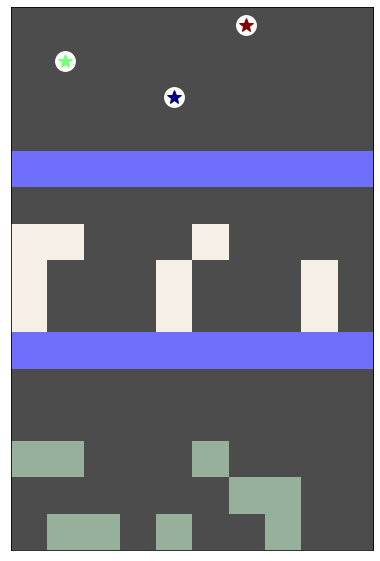

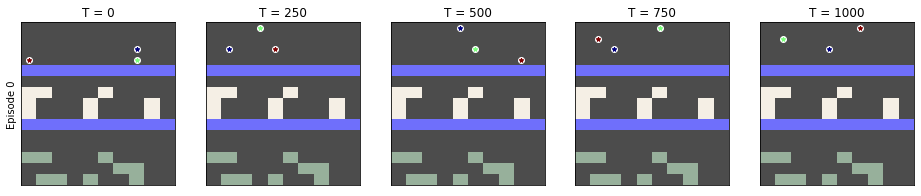

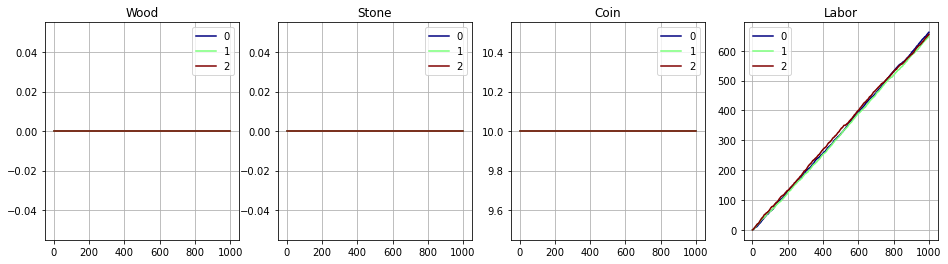

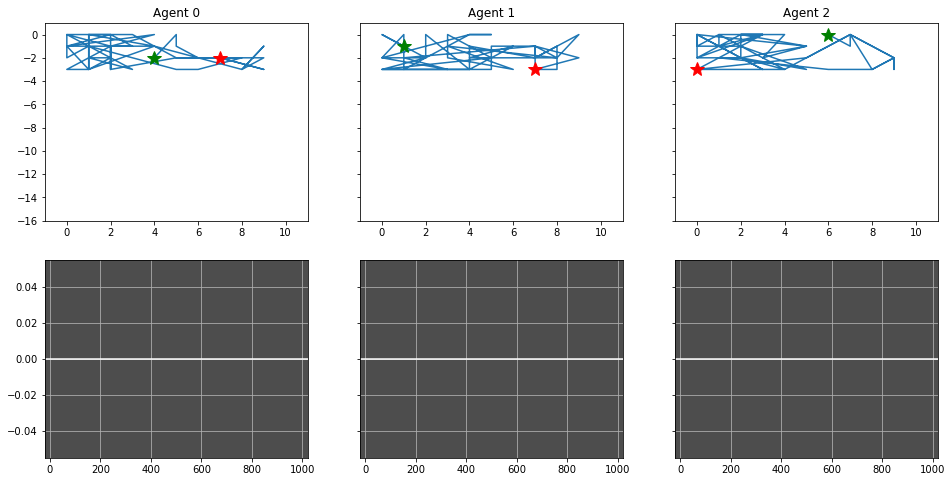

In [11]:
play_random_episode(env, plot_every=10, do_dense_logging=True)
dense_log = env.previous_episode_dense_log
plotting.breakdown(dense_log)

In [14]:
print(env.get_agent(0).__dict__['state']['build_payment'])

print(env.get_agent(1).__dict__['state']['build_payment'])

print(env.get_agent(2).__dict__['state']['build_payment'])

20.28585420491971
11.086067971880627
13.020654126834309


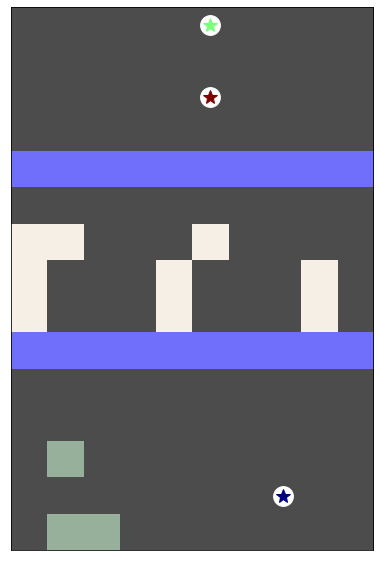

In [15]:
play_random_episode(env, plot_every=10, do_dense_logging=True)
dense_log = env.previous_episode_dense_log


_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 ____
Cost (Wood)    :   2.12 (n= 26) |   1.78 (n= 27) |   1.54 (n= 28)
Cost (Stone)   :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   

Income (Wood)  :   1.73 (n= 33) |   1.95 (n= 22) |   1.77 (n= 26)
Income (Stone) :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   
Income (Build) :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   


((<Figure size 1152x216 with 5 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x576 with 6 Axes>),
 {'Sell Stone': [0, 0, 0],
  'Buy Stone': [0, 0, 0],
  'Sell Wood': [57, 43, 46],
  'Buy Wood': [-55, -48, -43],
  'Build': [0, 0, 0],
  'Total': array([ 2, -5,  3])},
 [12, 5, 13],
 {'Stone': [],
  'Wood': [{'t': 7,
    't_ask': 7,
    't_bid': 0,
    'commodity': 'Wood',
    'buyer': 1,
    'bid': 10,
    'bid_lifetime': 7,
    'seller': 0,
    'ask': 10,
    'ask_lifetime': 0,
    'price': 10,
    'cost': 10,
    'income': 10},
   {'t': 102,
    't_ask': 102,
    't_bid': 61,
    'commodity': 'Wood',
    'buyer': 2,
    'bid': 1,
    'bid_lifetime': 41,
    'seller': 0,
    'ask': 1,
    'ask_lifetime': 0,
    'price': 1,
    'cost': 1,
    'income': 1},
   {'t': 110,
    't_ask': 110,
    't_bid': 103,
    'commodity': 'Wood',
    'buyer': 2,
    'bid': 5,
    'bid_lifetime': 7,
    'seller': 1,
    'ask': 1,
    'ask_lifetime': 0,
    'price': 5,
    'cost': 5,
    'i

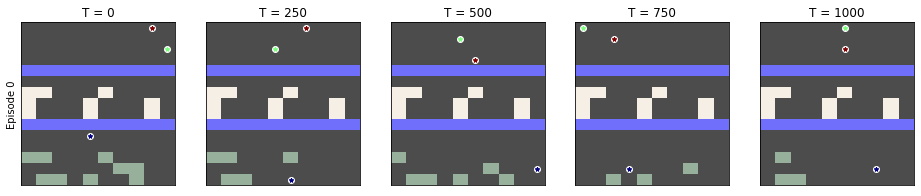

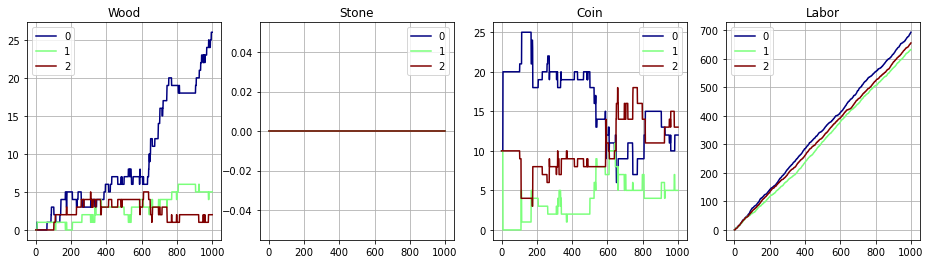

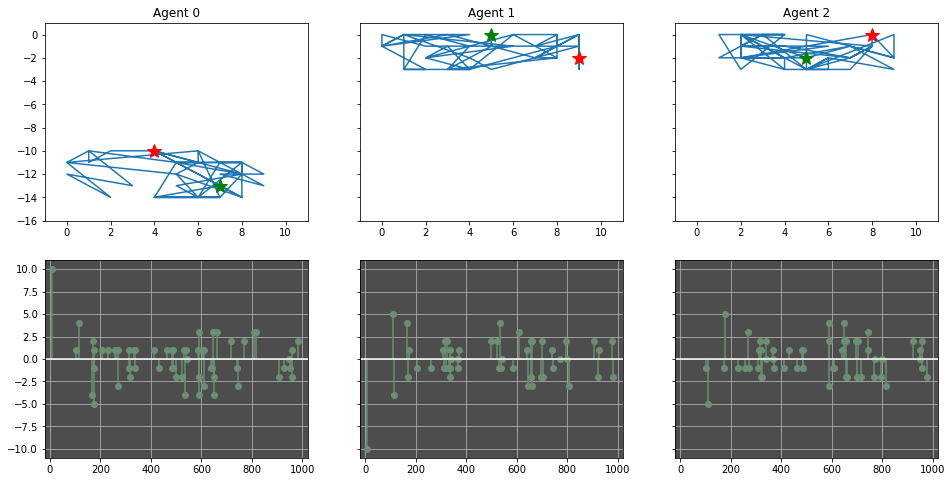

In [16]:
plotting.breakdown(dense_log)

In [17]:
for agent_idx, reward in rew.items(): 
    print("{:2} {:.3f}".format(agent_idx, reward))

0  -0.053
1  -0.053
2  0.000
p  0.000


In [21]:
from ai_economist.foundation.base.base_env import BaseEnvironment, scenario_registry
from ai_economist.foundation.scenarios.simple_wood_and_stone.layout_from_file import LayoutFromFile
@scenario_registry.add
class MyTest(LayoutFromFile):
    name ="mytest"
    def __init__(self,*base_env_args,**base_env_kwargs):
        super().__init__(*base_env_args, **base_env_kwargs)
        self.env_layout_file="quadrant_25x25_20each_30clump.txt"
        self._ranked_locs = [(0,0),(0,0),(0,0)]

In [22]:
env_config = {
    'scenario_name': 'mytest',
    'components': [
        ('Build', {'skill_dist': "pareto", 'payment_max_skill_multiplier': 3}),
        ('ContinuousDoubleAuction', {'max_num_orders': 5}),
        ('Gather', {}),
    ],   
    'env_layout_file': 'my_map_sperate.txt',
    'starting_agent_coin': 10,
    'fixed_four_skill_and_loc': False,    
    'n_agents': 3,          
    'world_size': [15, 10], 
    'episode_length': 1000,     
    'multi_action_mode_agents': False,
    'multi_action_mode_planner': True,
    'flatten_observations': False,
    'flatten_masks': True,
}
env = foundation.make_env_instance(**env_config)

_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 ____
Cost (Wood)    :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   
Cost (Stone)   :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   

Income (Wood)  :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   
Income (Stone) :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   
Income (Build) :    ~~~~~~~~    |    ~~~~~~~~    |    ~~~~~~~~   


((<Figure size 1152x216 with 5 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x576 with 6 Axes>),
 {'Sell Stone': [0, 0, 0],
  'Buy Stone': [0, 0, 0],
  'Sell Wood': [0, 0, 0],
  'Buy Wood': [0, 0, 0],
  'Build': [0, 0, 0],
  'Total': array([0, 0, 0])},
 [10, 10, 10],
 {'Stone': [], 'Wood': []},
 [])

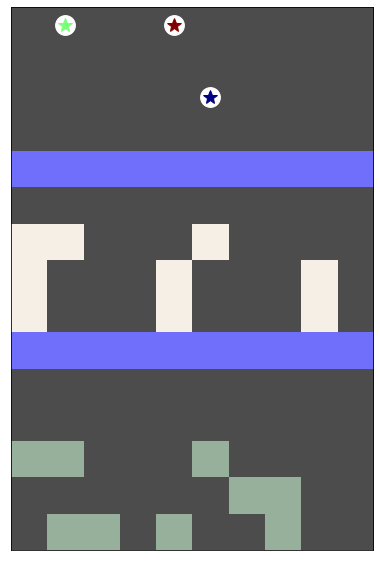

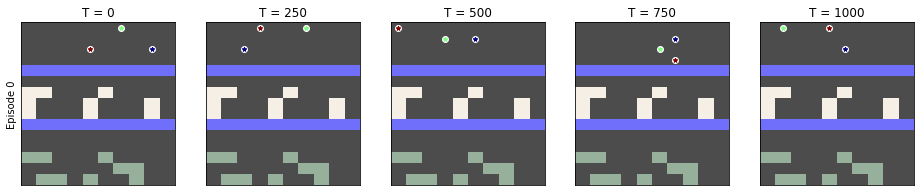

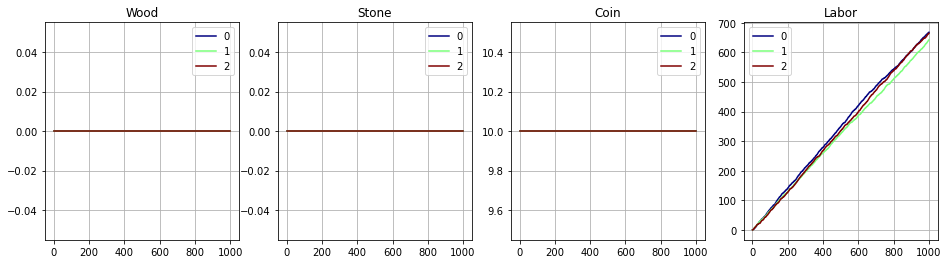

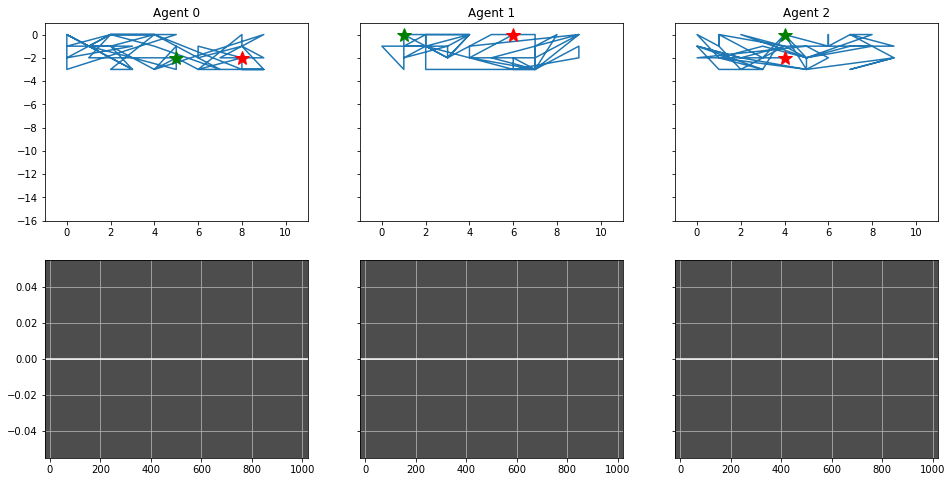

In [23]:
play_random_episode(env, plot_every=10, do_dense_logging=True)
dense_log = env.previous_episode_dense_log
plotting.breakdown(dense_log)